# Local files

### Download and Uplaod

Download and upload files via the Spark Notebook interface.

### Access Local Files

The file path to local files requires `file://` prefix.

In [1]:
ls /etc/passwd

/etc/passwd


# s3helper

The object `s3helper` is a tool to transfer files between local filesystem, HDFS and S3.

Run `s3helper.help()` to learn all its methods.

In [2]:
s3helper.help()


        s3helper is a helper object to move files and directory between
        local filesystem, AWS S3 and local HDFS.

        Usage:

        1. Open a S3 bucket under your account
            s3helper.open_bucket(<bucket_name>)
        2. List all files under the opened S3 bucket
            s3helper.ls() or s3helper.ls_s3()
        Or optionally,
            s3helper.ls(<file_path>) or s3helper.ls_s3(<file_path>)
        3. List all files on HDFS
            s3helper.ls_hdfs()
        Or optionally,
            s3helper.ls_hdfs(<file_path>)
        where <file_path> is an absolute path in the opened S3 bucket.

        Now you can access your S3 files.

        1. Transfer files between S3 and HDFS
          a. To download all S3 files under a directory to HDFS, please call
                s3helper.s3_to_hdfs(<s3_directory_path>, <HDFS_directory_path>)
          b. To upload a directory on HDFS to S3, please call
                s3helper.hdfs_to_s3(<HDFS_directory_path>, <s3_dir

## (2) Copy meta information files

In [3]:
s3helper.open_bucket('mas-dse-open',region='us-west-2')

In [4]:
info_files=s3helper.ls('Weather/Info')
Without_path=[x[13:] for x in info_files]


In [5]:
!mkdir /mnt/workspace/WeatherInfo

In [6]:
for i in range(len(info_files)-1):   # Last entry is the directory name
    _from=info_files[i]
    _to='/mnt/workspace/WeatherInfo/'+Without_path[i]
    print('From %s to %s'%(_from,_to))
    s3helper.s3_to_local(_from,_to)

From Weather/Info/README.md to /mnt/workspace/WeatherInfo/README.md
From Weather/Info/US_stations.tsv.gz to /mnt/workspace/WeatherInfo/US_stations.tsv.gz
From Weather/Info/all_stations.tsv.gz to /mnt/workspace/WeatherInfo/all_stations.tsv.gz
From Weather/Info/data-source.txt to /mnt/workspace/WeatherInfo/data-source.txt
From Weather/Info/dist2coast.txt.gz to /mnt/workspace/WeatherInfo/dist2coast.txt.gz
From Weather/Info/ghcnd-countries.txt to /mnt/workspace/WeatherInfo/ghcnd-countries.txt
From Weather/Info/ghcnd-readme.txt to /mnt/workspace/WeatherInfo/ghcnd-readme.txt
From Weather/Info/ghcnd-states.txt to /mnt/workspace/WeatherInfo/ghcnd-states.txt
From Weather/Info/ghcnd-stations_buffered.txt to /mnt/workspace/WeatherInfo/ghcnd-stations_buffered.txt
From Weather/Info/ghcnd-version.txt to /mnt/workspace/WeatherInfo/ghcnd-version.txt
From Weather/Info/stations_projections.pickle to /mnt/workspace/WeatherInfo/stations_projections.pickle


### Link to original information

Looking in README.md, you see that all of the data can be downloaded from the noaa web site.

In [ ]:
# %load /mnt/workspace/WeatherInfo/README.md

## Meta-data for weather data collection

### Original info files
Downloaded from ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/  

* 2016-04-13 13:58:29        270 `ghcnd-version.txt`
* 2016-04-13 13:58:26        218 `data-source.txt`
* 2016-04-13 13:58:27      22422 `ghcnd-readme.txt`  : Main documentation.
* 2016-04-13 13:58:28    7760844 `ghcnd-stations_buffered.txt`

### Compliled tables
* 2018-03-15 08:52:40    1519539 `all_stations.tsv.gz` : a tab-separated version of `ghcnd-stations_buffered.txt`
* 2018-03-15 08:52:16     328590 `US_stations.tsv.gz` : a tab separated list of stations in the US that have a sufficient number of measurement. Includes also distance to shoreline for station.


In [9]:
# !cat /mnt/workspace/WeatherInfo/ghcnd-readme.txt

README FILE FOR DAILY GLOBAL HISTORICAL CLIMATOLOGY NETWORK (GHCN-DAILY) 
Version 3.00

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

I. DOWNLOAD QUICK START

Start by downloading "ghcnd-stations.txt," which has metadata for all stations.

Then download one of the following TAR files:

  - "ghcnd-all.tar.gz" if you want all of GHCN-Daily, OR
  - "ghcnd-gsn.tar.gz" if you only want the GCOS Surface Network (GSN), OR
  - "ghcnd-hcn.tar.gz" if you only want the U.S. Historical Climatology Network 
    (U.S. HCN).

Then uncompress and untar the contents of the tar file, 
e.g., by using the following Linux command:

tar xzvf ghcnd_xxx.tar.gz

Where "xxx" stands for "all", "hcn", or "gsn" as applicable. The files will be 
extracted into a subdirectory under the directory where the command is issued.

ALTERNATIVELY, if you only need data for one station:

  - Find the station's

## Open Main data bucket

In [10]:
s3helper.open_bucket('dse-weather-west-2', region="us-west-2")
s3helper.ls('')

[u'.aws',
 u'.bash_profile',
 u'.bashrc',
 u'.conda',
 u'.ipython',
 u'.jupyter',
 u'.local',
 u'.ssh',
 u'ALL.csv.gz',
 u'ALLBootstrap.sh',
 u'MasterBootstrap.sh',
 u'NY.parquet',
 u'PrivateBootstrap.sh',
 u'RunFromTerminal.sh',
 u'US_Weather_with_smoothed.parquet',
 u'US_Weather_with_smoothed.parquet_$folder$',
 u'US_stations.parquet',
 u'US_weather.parquet',
 u'fromLocal',
 u'info',
 u's3helper.py',
 u's3hook.sh',
 u'weather.parquet']

## (3) List files in the S3 bucket and HDFS.

In [11]:
print('list all files in the root directory of the bucket')
print("\n".join(s3helper.ls_s3()))
print('\nList files in directory "fromHDFS"')
print(s3helper.ls_s3('fromHDFS'))
print('\nList files in root of hdfs')
print(s3helper.ls_hdfs());

list all files in the root directory of the bucket
.aws
.bash_profile
.bashrc
.conda
.ipython
.jupyter
.local
.ssh
ALL.csv.gz
ALLBootstrap.sh
MasterBootstrap.sh
NY.parquet
PrivateBootstrap.sh
RunFromTerminal.sh
US_Weather_with_smoothed.parquet
US_Weather_with_smoothed.parquet_$folder$
US_stations.parquet
US_weather.parquet
fromLocal
info
s3helper.py
s3hook.sh
weather.parquet

List files in directory "fromHDFS"
[]

List files in root of hdfs
Found 3 items
drwxrwxrwt   - hdfs hadoop          0 2020-05-06 16:49 /tmp
drwxr-xr-x   - hdfs hadoop          0 2020-05-06 16:49 /user
drwxr-xr-x   - hdfs hadoop          0 2020-05-06 16:49 /var

None


## (4) Move files around local filesystem, HDFS and S3

As described in `s3helper.help()`, there are five methods for file transfers:

1. `s3helper.s3_to_hdfs(<s3_directory_path>, <HDFS_directory_path>)`
2. `s3helper.hdfs_to_s3(<HDFS_directory_path>, <s3_directory_path>)`
3. `s3helper.s3_to_local(<s3_file_path>, <local_file_path>)`
4. `s3helper.local_to_s3(<local_file_path>, <s3_directory_path>)`
5. `s3helper.local_to_hdfs(<local_dir_path>, <HDFS_dir_path>)`

In [12]:
s3helper.local_to_s3("/home/hadoop/s3helper.py", "fromLocal/s3helper.py")

In [13]:
print(s3helper.ls_s3("fromLocal"))

[u'fromLocal/s3helper.py']


## Move data from S3 to HDFS to Dataframe

In [14]:
%%time
s3helper.s3_to_hdfs("weather.parquet", "/tmp/weather.parquet")

20/05/06 18:14:06 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/_SUCCESS' for reading
20/05/06 18:14:06 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/part-00000-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet' for reading
20/05/06 18:14:07 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/part-00001-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet' for reading
20/05/06 18:14:09 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/part-00002-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet' for reading
20/05/06 18:14:10 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/part-00003-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet' for reading
20/05/06 18:14:11 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/part-00004-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet' for

Found 59 items
-rw-r--r--   1 hadoop hadoop          0 2020-05-06 18:14 /tmp/weather.parquet/_SUCCESS
-rw-r--r--   1 hadoop hadoop   40670401 2020-05-06 18:14 /tmp/weather.parquet/part-00000-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet
-rw-r--r--   1 hadoop hadoop   40307528 2020-05-06 18:14 /tmp/weather.parquet/part-00001-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet
-rw-r--r--   1 hadoop hadoop   40016618 2020-05-06 18:14 /tmp/weather.parquet/part-00002-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet
-rw-r--r--   1 hadoop hadoop   40377232 2020-05-06 18:14 /tmp/weather.parquet/part-00003-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet
-rw-r--r--   1 hadoop hadoop   40119938 2020-05-06 18:14 /tmp/weather.parquet/part-00004-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet
-rw-r--r--   1 hadoop hadoop   40278884 2020-05-06 18:14 /tmp/weather.parquet/part-00005-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet
-rw-r--r--   1 hadoop 

In [15]:
%%time 
s3helper.s3_to_hdfs("info/stations.parquet", "/tmp/stations.parquet")

20/05/06 18:15:44 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/info/stations.parquet/_SUCCESS' for reading
20/05/06 18:15:44 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/info/stations.parquet/_common_metadata' for reading
20/05/06 18:15:44 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/info/stations.parquet/_metadata' for reading
20/05/06 18:15:44 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/info/stations.parquet/part-r-00000-1fd04699-91d3-4a2a-9b36-e25c9c5f0376.gz.parquet' for reading
20/05/06 18:15:45 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/info/stations.parquet/part-r-00001-1fd04699-91d3-4a2a-9b36-e25c9c5f0376.gz.parquet' for reading

Found 5 items
-rw-r--r--   1 hadoop hadoop          0 2020-05-06 18:15 /tmp/stations.parquet/_SUCCESS
-rw-r--r--   1 hadoop hadoop        894 2020-05-06 18:15 /tmp/stations.parquet/_common_metadata
-rw-r--r--   1 hadoop hadoop       3107 2020-05-06 18:15 /tmp/s

In [16]:
print(s3helper.ls_hdfs("/tmp"))

Found 3 items
drwxrwxrwx   - mapred mapred          0 2020-05-06 16:49 /tmp/hadoop-yarn
drwxr-xr-x   - hadoop hadoop          0 2020-05-06 18:15 /tmp/stations.parquet
drwxr-xr-x   - hadoop hadoop          0 2020-05-06 18:15 /tmp/weather.parquet

None


# Up to here needs to be executed once each time a spark cluster is created.
The HDFS files will stay there as long as you keep the cluster on.

# From here down needs to be executed each time a notebooks is restarted

In [ ]:
sc.stop()

In [1]:
%%time
from pyspark import SparkContext

sc = SparkContext()

from pyspark import SparkContext
from pyspark.sql import SQLContext

sqlContext = SQLContext(sc)

CPU times: user 188 ms, sys: 24 ms, total: 212 ms
Wall time: 13.8 s


## Get all data

In [2]:
%%time
df = sqlContext.sql("SELECT * FROM parquet.`/tmp/weather.parquet` ORDER BY Year DESC")

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 7.36 s


In [3]:
%%time
stations=sqlContext.sql("SELECT * FROM parquet.`/tmp/stations.parquet`")

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 193 ms


In [15]:
df.show()

+-----------+-----------+----+--------------------+
|    Station|Measurement|Year|              Values|
+-----------+-----------+----+--------------------+
|USC00126164|       SNOW|2013|[C0 50 00 00 00 0...|
|USC00502642|       TMAX|2013|[00 7E 00 53 80 5...|
|USC00126164|       SNWD|2013|[90 59 C0 58 60 5...|
|CA001038332|       SNOW|2013|[00 00 00 00 00 0...|
|USC00126164|       TMAX|2013|[00 46 80 CD 40 D...|
|CA001038332|       TMAX|2013|[E0 52 60 54 00 5...|
|USC00126164|       TMIN|2013|[00 CF B0 D8 60 D...|
|CA001038332|       TMIN|2013|[00 C5 80 4B 00 C...|
|USC00126164|       TOBS|2013|[00 CF B0 D8 28 D...|
|USW00013899|       SNOW|2013|[00 00 00 00 00 0...|
|US1MNMR0004|       PRCP|2013|[00 00 00 00 00 4...|
|USW00013899|       TMAX|2013|[48 5B 08 59 30 5...|
|US1MNMR0004|       SNOW|2013|[00 00 00 00 00 4...|
|US1CODG0132|       PRCP|2013|[00 00 00 00 00 0...|
|US1CODG0132|       SNOW|2013|[00 00 00 00 00 0...|
|CA001038332|       PRCP|2013|[00 00 00 00 00 5...|
|US1CODG0132

In [21]:
stations.show()

+-----------+--------+---------+---------+-----+-------------+-------+-------+-----+
|         ID|latitude|longitude|elevation|state|         name|GSNFLAG|HCNFLAG|WMOID|
+-----------+--------+---------+---------+-----+-------------+-------+-------+-----+
|US1COLR0185|  40.711|-105.1144|   1599.0|   CO|WELLINGTON 5.|       |       |     |
|US1COLR0186| 40.8135|-105.0963|   1601.7|   CO|BUCKEYE 0.9 S|       |       |     |
|US1COLR0187| 40.7689| -105.064|   1653.8|   CO|WELLINGTON 5.|       |       |     |
|US1COLR0189|  40.689|-105.0242|   1594.1|   CO|WELLINGTON 1.|       |       |     |
|US1COLR0193| 40.6711|-105.0639|   1584.0|   CO|WELLINGTON 3.|       |       |     |
|US1COLR0196|  40.691|-105.0157|   1581.9|   CO|WELLINGTON 0.|       |       |     |
|US1COLR0197|  40.625|-105.3403|   2464.0|   CO|    BLV 8.0 W|       |       |     |
|US1COLR0200| 40.3345|-105.5127|   2431.1|   CO|ESTES PARK 2.|       |       |     |
|US1COLR0201| 40.4701|-105.4493|   2303.1|   CO|GLEN HAVEN 1.|   

## Get total measurement count by year

In [4]:
%%time
yearCount = sqlContext.sql("SELECT Year, COUNT(*) FROM parquet.`/tmp/weather.parquet` GROUP BY Year ORDER BY Year DESC")

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 266 ms


In [7]:
%%time
yearCount.show(10)

+----+--------+
|Year|count(1)|
+----+--------+
|2013|   64353|
|2012|  137060|
|2011|  150630|
|2010|  152006|
|2009|  149692|
|2008|  148206|
|2007|  135951|
|2006|  126041|
|2005|  127879|
|2004|  128189|
+----+--------+
only showing top 10 rows

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 27.4 s


In [8]:
allyears = yearCount.select('Year').collect()
allcounts = yearCount.select('Count(1)').collect()

In [15]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Text(0.5,0,'year')

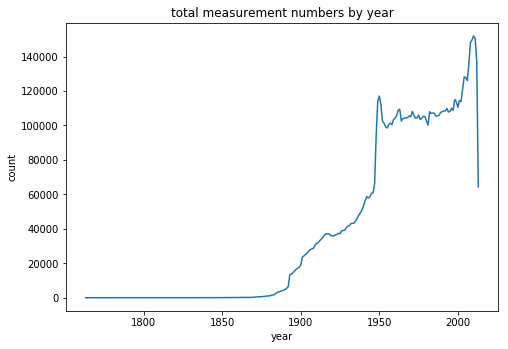

In [26]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.plot(allyears, allcounts)
ax1.set_title('total measurement numbers by year')
ax1.set_ylabel('count')
ax1.set_xlabel('year')

## Get Measurement count of haze/smog by year

In [18]:
%%time
qry = "SELECT Year, COUNT(*) FROM parquet.`/tmp/weather.parquet` WHERE Measurement='WT08' GROUP BY Year ORDER BY Year DESC"
smogCount = sqlContext.sql(qry)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.64 s


In [19]:
%%time
smogCount.show(10)

+----+--------+
|Year|count(1)|
+----+--------+
|2012|     444|
|2011|     910|
|2010|     915|
|2009|     905|
|2008|     901|
|2007|     904|
|2006|     878|
|2005|     573|
|2004|     463|
|2003|     455|
+----+--------+
only showing top 10 rows

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 9.42 s


In [24]:
smogyears = smogCount.select('Year').collect()
smogcounts = smogCount.select('Count(1)').collect()

Text(0.5,0,'year')

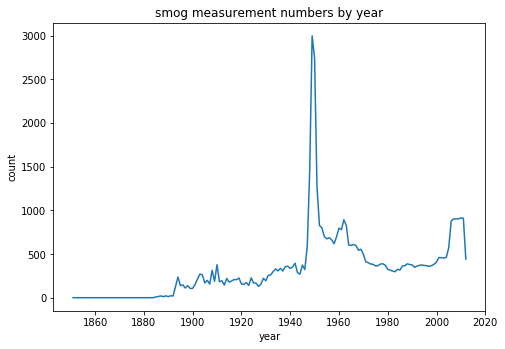

In [25]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.plot(smogyears,smogcounts)
ax2.set_title('smog measurement numbers by year')
ax2.set_ylabel('count')
ax2.set_xlabel('year')

In [31]:
%%time
query="""
SELECT *
FROM parquet.`/tmp/weather.parquet`
WHERE measurement='WT08'
"""
print(query)
WT08_df=sqlContext.sql(query)
WT08_pdf=WT08_df.toPandas()


SELECT *
FROM parquet.`/tmp/weather.parquet`
WHERE measurement='WT08'

CPU times: user 796 ms, sys: 76 ms, total: 872 ms
Wall time: 21.2 s


In [32]:
WT08_pdf.head(5)

,Station,Measurement,Year,Values
0,USW00093819,WT08,1948,"[0, 60, 0, 60, 0, 60, 0, 60, 0, 60, 0, 126, 0,..."
1,USW00093819,WT08,1949,"[0, 126, 0, 60, 0, 60, 0, 60, 0, 126, 0, 126, ..."
2,USW00093819,WT08,1950,"[0, 60, 0, 126, 0, 126, 0, 126, 0, 60, 0, 60, ..."
3,USW00093819,WT08,1951,"[0, 60, 0, 126, 0, 126, 0, 60, 0, 60, 0, 60, 0..."
4,USW00093819,WT08,1952,"[0, 60, 0, 126, 0, 60, 0, 60, 0, 60, 0, 126, 0..."


In [17]:
%%time
smogData = sqlContext.sql("SELECT * FROM parquet.`/tmp/weather.parquet` WHERE Measurement='WT08' ORDER BY Year DESC")

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 187 ms


In [18]:
smogData.show(10)

+-----------+-----------+----+--------------------+
|    Station|Measurement|Year|              Values|
+-----------+-----------+----+--------------------+
|USW00004751|       WT08|2012|[00 7E 00 7E 00 3...|
|USW00014950|       WT08|2012|[00 7E 00 7E 00 7...|
|USW00024152|       WT08|2012|[00 7E 00 7E 00 7...|
|USW00093026|       WT08|2012|[00 7E 00 7E 00 7...|
|USW00023233|       WT08|2012|[00 3C 00 3C 00 7...|
|USW00014935|       WT08|2012|[00 7E 00 7E 00 7...|
|USW00014732|       WT08|2012|[00 7E 00 7E 00 7...|
|USW00003927|       WT08|2012|[00 7E 00 7E 00 7...|
|USW00024235|       WT08|2012|[00 7E 00 7E 00 7...|
|USW00013899|       WT08|2012|[00 7E 00 7E 00 7...|
+-----------+-----------+----+--------------------+
only showing top 10 rows



### Example: Counting the number of stations in each country

In [30]:
stations.show()

+-----------+--------+---------+---------+-----+-------------+-------+-------+-----+
|         ID|latitude|longitude|elevation|state|         name|GSNFLAG|HCNFLAG|WMOID|
+-----------+--------+---------+---------+-----+-------------+-------+-------+-----+
|US1COLR0185|  40.711|-105.1144|   1599.0|   CO|WELLINGTON 5.|       |       |     |
|US1COLR0186| 40.8135|-105.0963|   1601.7|   CO|BUCKEYE 0.9 S|       |       |     |
|US1COLR0187| 40.7689| -105.064|   1653.8|   CO|WELLINGTON 5.|       |       |     |
|US1COLR0189|  40.689|-105.0242|   1594.1|   CO|WELLINGTON 1.|       |       |     |
|US1COLR0193| 40.6711|-105.0639|   1584.0|   CO|WELLINGTON 3.|       |       |     |
|US1COLR0196|  40.691|-105.0157|   1581.9|   CO|WELLINGTON 0.|       |       |     |
|US1COLR0197|  40.625|-105.3403|   2464.0|   CO|    BLV 8.0 W|       |       |     |
|US1COLR0200| 40.3345|-105.5127|   2431.1|   CO|ESTES PARK 2.|       |       |     |
|US1COLR0201| 40.4701|-105.4493|   2303.1|   CO|GLEN HAVEN 1.|   

In [ ]:
st_names=stations.select('ID').collect()

In [32]:
len(st_names)

85284

In [33]:
st_names1=[r.ID for r in st_names]

In [34]:
st_names1[-5:]

[u'US1COLR0171',
 u'US1COLR0172',
 u'US1COLR0173',
 u'US1COLR0181',
 u'US1COLR0183']

In [35]:
from collections import Counter

In [36]:
C=Counter([x[:2] for x in st_names1])

In [37]:
sorted_prefix=sorted(C.items(),key=lambda x:x[1],reverse=True)

In [38]:
len(sorted_prefix)

180

In [39]:
sorted_prefix[:10]

[(u'US', 46051),
 (u'AS', 17081),
 (u'BR', 5935),
 (u'CA', 5286),
 (u'IN', 3805),
 (u'SF', 1154),
 (u'RS', 1099),
 (u'NO', 419),
 (u'NL', 359),
 (u'KZ', 328)]

In [40]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [41]:
counts = np.array([x[1] for x in sorted_prefix])

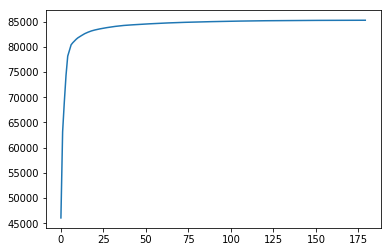

In [42]:
cumul=np.cumsum(counts)
plot(cumul)

In [43]:
cumul[-1]

85284

In [44]:
type(cumul)

numpy.ndarray

## Excercises

1. Count the total number of yearXstationXmeasurement  Records (YSMRs) for each country.
2. Count the number of YSMR's for each measurement.
3. Compute the mean P/M std of TOBS for each country and each state.